In [66]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import imblearn 
from imblearn.over_sampling import SMOTE

df = pd.read_csv('processed_dataset.csv')

#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,1:-1]
y = df.iloc[:,-1] #[-1]]

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape) #shape before smote
sm = SMOTE(random_state = 101)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(X_train.shape, X_test.shape) #shape after smote

(71596, 13) (30685, 13)


In [68]:
parameters = {'n_estimators' : [490, 500],
    'max_depth' :  [10, 15, 20],
    'min_samples_split' :[2,4,6],
     'min_samples_leaf' :[1,2,4],     
    'criterion':['entropy']}
rand_forest = RandomForestClassifier()
gs = GridSearchCV(rand_forest, parameters, cv=3, scoring = 'f1', verbose=1, n_jobs=-1, refit=True)

In [69]:
gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('**GRIDSEARCH RESULTS**')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\franc\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.82700697 0.82695842        nan        nan
 0.82617923 0.82628339        nan        nan 0.82751821 0.82730682
        nan        nan 0.82710059 0.82702972]
  warnings.warn(


**GRIDSEARCH RESULTS**
Best score: 0.827518 using {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 490}
nan (nan) with: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 490}
nan (nan) with: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 500}
0.827007 (0.004941) with: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 490}
0.826958 (0.005030) with: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
nan (nan) with: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 490}
nan (nan) with: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 500}
0.826179 (0.004876) with: {'criterion': 'entropy', 'max_depth': 

              precision    recall  f1-score   support

           0       0.93      0.68      0.79     20951
           1       0.57      0.90      0.70      9734

    accuracy                           0.75     30685
   macro avg       0.75      0.79      0.74     30685
weighted avg       0.82      0.75      0.76     30685



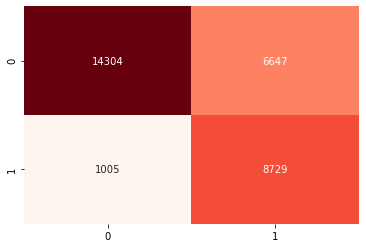

In [70]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

print(classification_report(y_test, y_pred))


In [71]:
best_model

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=490)

In [72]:
print("f1_score: ", metrics.f1_score(y_test, y_pred))

f1_score:  0.6952608522500996


In [73]:
preds_train = best_model.predict(X_train)
print("f1_score: ", metrics.f1_score(y_train, preds_train))

f1_score:  0.852614637606045
